0.5128175942120714
0.4999999962518467
0.487182370375232
0.4743816069964846


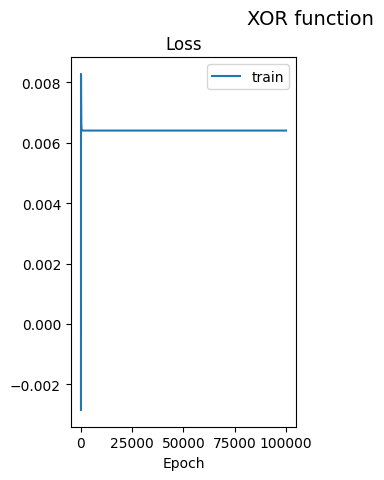

In [34]:
# Attempting to train a perceptron for the XOR function
import numpy as np
from NeuralNetwork import Perceptron
from Functions import Sigmoid
import matplotlib.pyplot as plt 

def plot_history(res) -> None:
	plt.suptitle("XOR function", fontsize=14)
	ax1 = plt.subplot(121)
	ax1.set_title("Loss")
	result_mapped = res
	ax1.plot(result_mapped, label="train")
	plt.xlabel("Epoch")
	ax1.legend()

# Initialize perperceptron
perceptron = Perceptron(np.array([0.01, -0.01],  dtype = 'f'), 0.02, Sigmoid)

# XOR function
inputs = np.array([0, 0], dtype = 'f'), np.array([0, 1], dtype = 'f'), np.array([1, 0], dtype = 'f'), np.array([1, 1], dtype = 'f')
outputs = np.array([0, 1, 1, 0], dtype = 'f')

history = []
for i in range(100000):
    for j in range(4):
        perceptron.update(perceptron.compute_loss(perceptron.forward(inputs[j]), outputs[j]), 0.1)
    total_loss = 0
    for k in range(4):
        total_loss += perceptron.compute_loss(perceptron.forward(inputs[k]), outputs[k]) / 4
    history.append(total_loss)

for i in range(4):
    print(perceptron.forward(inputs[i]))

plot_history(history)

In [37]:
# Predicting the unknown dataset
import numpy as np
from NeuralNetwork import ANN
from DataSplit import DataSet

ds = DataSet(0.0)

best_param = {'lr': 0.1, 'ls': [25, 7], 'epochs': 1000}
early_stop = 100
num_classes = 7

ann = ANN(ds.train_features.shape[1], best_param["ls"], learning_rate=best_param["lr"])
ann.fit(ds.train_features, ds.train_targets, ds.train_features, ds.train_targets, num_classes, best_param["epochs"], early_stop)

unknown = np.genfromtxt("../data/unknown.txt", delimiter=",")


prediction = ann.predict(unknown)

print(prediction)

[2 6 7 1 6 5 1 3 7 7 3 3 1 3 6 4 2 4 2 2 7 5 6 6 5 1 1 3 1 6 6 4 4 4 4 4 5
 2 3 7 4 6 5 5 5 7 5 4 5 1 5 5 2 1 6 3 1 7 1 1 3 6 3 2 7 2 2 2 7 7 7 6 7 1
 4 1 4 4 1 7 1 4 1 4 4 2 3 2 1 7 6 2 7 1 2 7 2 2 5 2 5 7 5 5 2 6 5 6 2 3 7
 4 1 5 5 7 5 2 4 4 7 1 2 1 1 4 7 4 7 7 7 6 6 7 7 4 4 4 3 5 3 4 1 1 2 6 6 5
 4 7 7 4 1 7 1 3 7 4 3 6 7 7 3 4 1 5 6 2 5 5 3 1 6 4 7 3 3 5 5 1 3 4 1 1 2
 3 3 2 5 3 4 6 1 6 6 2 2 3 6 7 7 2 5 3 5 6 7 4 2 2 3 6 2 6 6 4 2 6 1 3 1 3
 6 2 2 6 7 1 6 1 1 5 2 4 5 4 4 4 7 7 4 1 5 5 3 1 1 6 6 5 4 4 6 2 6 1 6 1 5
 3 5 3 3 6 1 2 6 6 6 2 4 5 3 5 3 3 4 7 6 4 3 6 7 7 2 2 7 2 1 4 6 3 4 5 4 6
 4 7 4 4 2 1 2 5 2 2 1 3 3 1 1 7 2 4 6 7 2 2 6 5 5 6 1 4 4 7 5 6 7 3 4 6 4
 3 5 1 7 5 4 3 2 1 7 6 2 2 5 4 2 1 4 7 6 4 1 5 4 4 6 7 3 1 3 1 1 4 7 4 7 2
 3 2 3 2 2 1 3 1 7 7 4 3 5 7 1 1 2 7 2 3 6 7 7 5 7 5 1 3 4 4 6 1 2 1 5 7 4
 1 1 1 5 4 2 2 7 7 7 2 3 4 2 4 7 1 2 6 7 7 5 1 7 4 6 3 7 5 5 3 2 3 1 4 1 6
 4 4 6 1 1 2 1 5 5 7 6 6 4 2 7 7 5 3 5 1 4 5 3 4 6 3 2 5 6 7 3 4 1 3 3 6 1
 1 7 2 2 4 1 6 5 5 6 5 3 

In [36]:
with open('43_classes.txt', 'w', newline='') as file:
    lst = prediction.tolist()
    lst = map(lambda x: str(x), lst)
    file.write(",".join(lst))